# **Step 1: Load the Data**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Display first few rows to understand the structure
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# **Step 2: Preprocessing**

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset (assuming it's not already loaded)
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Convert to lowercase
df['message'] = df['v2'].str.lower() # Changed 'message' to 'v2' assuming your message column is named 'v2'

# Remove punctuation and special characters
df['message'] = df['message'].apply(lambda x: re.sub(r'\W', ' ', x))

# Tokenize words
df['message'] = df['message'].apply(lambda x: word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: [word for word in x if word not in stop_words])

# Join tokens into a string (required for TF-IDF vectorization)
df['message'] = df['message'].apply(lambda x: ' '.join(x))

# Display processed data
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4                                            message  
0        NaN        NaN  go jurong point crazy available bugis n great ...  
1        NaN        NaN                            ok lar joking wif u oni  
2        NaN        NaN  free entry 2 wkly comp win fa cup final tkts 2...  
3        NaN        NaN                u dun say early hor u c already say  
4        NaN        NaN             nah think goes usf lives around though  


# **Step 3: Feature Extraction (TF-IDF)**

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['message'])

# Convert sparse matrix to DataFrame (optional, for visualization)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF features
print(tfidf_df.head())

    00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

   0125698789   02  ...   ó_   û_  û_thanks  ûªm  ûªt  ûªve   ûï  ûïharry  \
0         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
1         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
2         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
3         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   
4         0.0  0.0  ...  0.0  0.0       0.0  0.0  0.0   0.0  0.0      0.0   

    ûò  ûówell  
0  0.0     0.0  
1  0.0     0.0  
2  0.0     0.0  
3  0.0     0.0  
4

# **Step 4: Model Training and Evaluation**

**Implementing Naive Bayes Classifier**

Naive Bayes Accuracy: 0.9730941704035875
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



<Figure size 800x600 with 0 Axes>

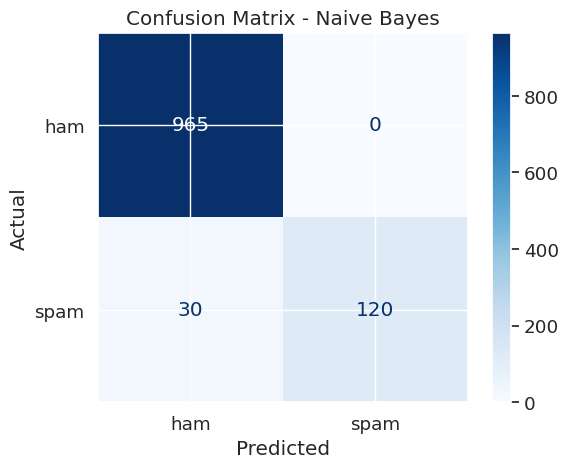

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

# 1. Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# 2. Train the classifier
nb_classifier.fit(X_train, y_train)

# 3. Predictions
nb_y_pred = nb_classifier.predict(X_test)

# 4. Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print("Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_y_pred))

# 5. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
nb_cm = confusion_matrix(y_test, nb_y_pred)
# Use ConfusionMatrixDisplay instead of plot_confusion_matrix
disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=nb_classifier.classes_)
# Remove cbar, it was introduced in a later version
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

**Implementing Logistic Regression**

Logistic Regression Accuracy: 0.9443946188340807
              precision    recall  f1-score   support

         ham       0.94      0.99      0.97       965
        spam       0.95      0.62      0.75       150

    accuracy                           0.94      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.94      0.94      0.94      1115



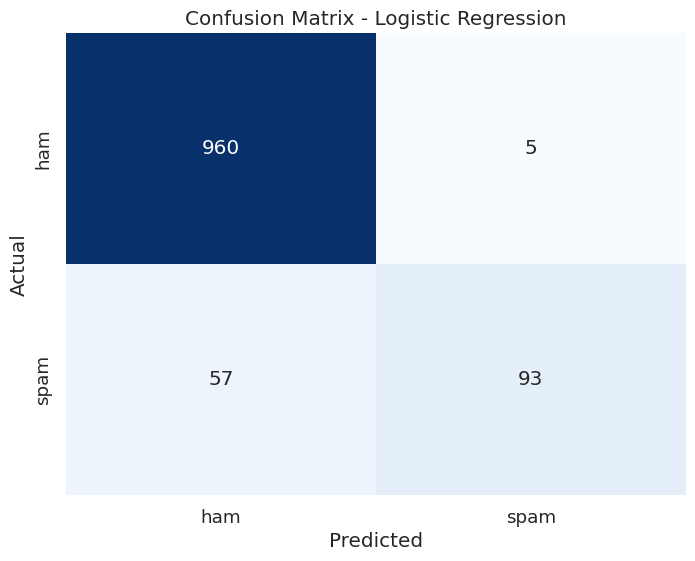

In [11]:
from sklearn.linear_model import LogisticRegression

# 1. Initialize Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# 2. Train the classifier
lr_classifier.fit(X_train, y_train)

# 3. Predictions
lr_y_pred = lr_classifier.predict(X_test)

# 4. Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_y_pred))

# 5. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
lr_cm = confusion_matrix(y_test, lr_y_pred)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Implementing SVM (Support Vector Machine)**

SVM Accuracy: 0.979372197309417
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



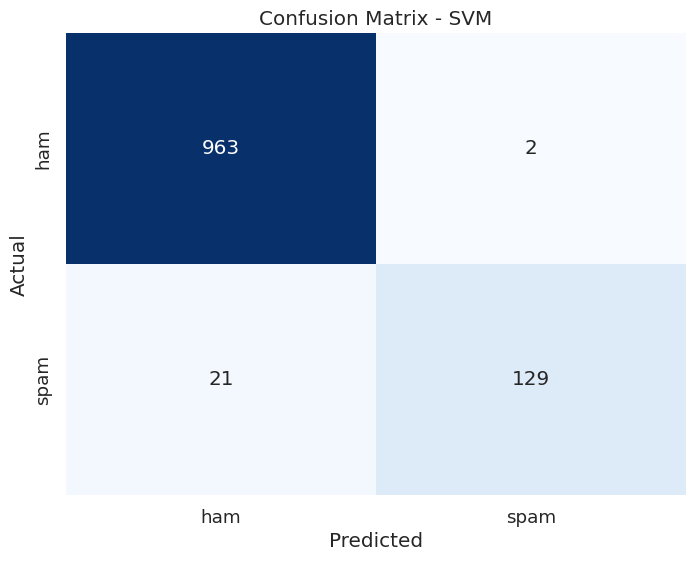

In [12]:
from sklearn.svm import SVC

# 1. Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# 2. Train the classifier (may take longer time depending on dataset size)
svm_classifier.fit(X_train, y_train)

# 3. Predictions
svm_y_pred = svm_classifier.predict(X_test)

# 4. Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_y_pred))

# 5. Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
svm_cm = confusion_matrix(y_test, svm_y_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# **Visualizations**

<ipython-input-16-cee6d22bd97d>:60: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  disp.plot(cmap='Blues', values_format='d', ax=plt.subplot(2, 3, len(roc_data)))


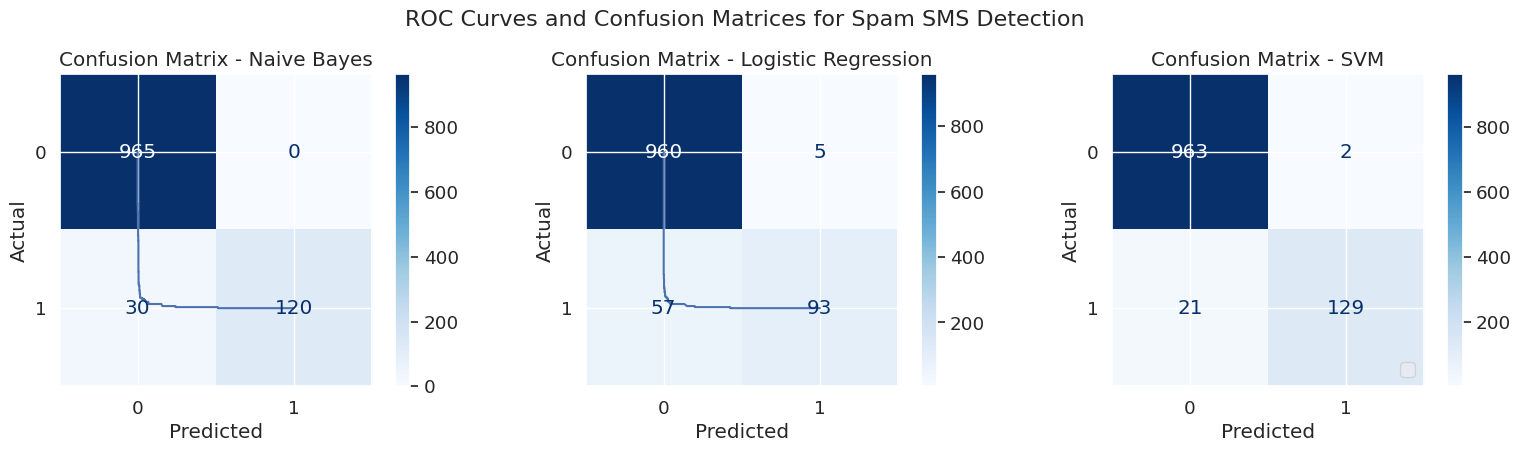

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
# plot_confusion_matrix is removed, use ConfusionMatrixDisplay instead
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming df and tfidf_matrix are already defined from previous steps

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['message'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['v1'], test_size=0.2, random_state=42)

# Convert string labels to numerical labels (0 for 'ham', 1 for 'spam')
y_train_numeric = y_train.map({'ham': 0, 'spam': 1})
y_test_numeric = y_test.map({'ham': 0, 'spam': 1})

# Initialize classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True)
}

# Dictionary to store ROC curve data
roc_data = {}

# Plot ROC curves and confusion matrices for each classifier
plt.figure(figsize=(16, 8))

for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train_numeric) # Use numerical labels for training

    # Predict probabilities for ROC curve
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_numeric, y_prob) # Use numerical labels for ROC curve
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data
    roc_data[name] = (fpr, tpr, roc_auc)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot confusion matrix
    cm = confusion_matrix(y_test_numeric, classifier.predict(X_test)) # Use numerical labels for confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=classifier.classes_)
    disp.plot(cmap='Blues', values_format='d', ax=plt.subplot(2, 3, len(roc_data)))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.legend(loc='lower right')
plt.subplots_adjust(top=0.9)
plt.suptitle('ROC Curves and Confusion Matrices for Spam SMS Detection', fontsize=16)
plt.show()

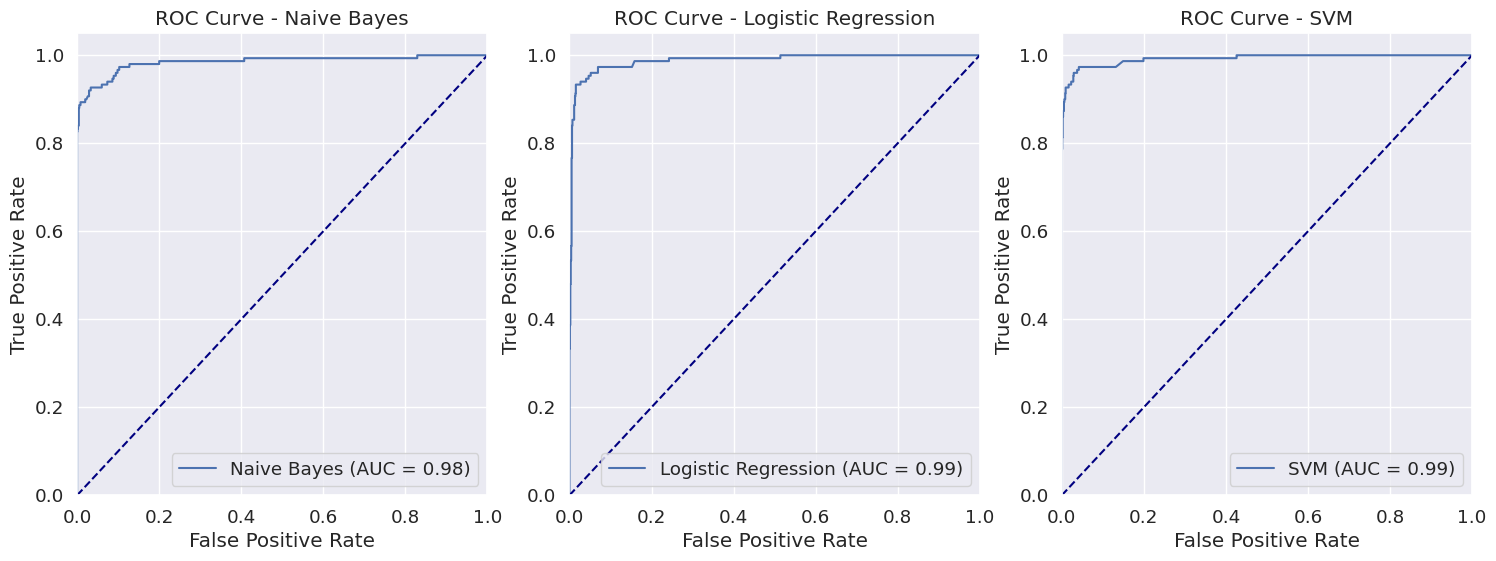

In [21]:
# Dictionary to store ROC curve data
roc_data = {}

# Plot ROC curves and confusion matrices for each classifier
plt.figure(figsize=(18, 6))

for i, (name, classifier) in enumerate(classifiers.items(), 1):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict probabilities for ROC curve
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    # Set 'spam' as the positive label
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='spam')
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data
    roc_data[name] = (fpr, tpr, roc_auc)

    # Plot ROC curve
    plt.subplot(1, 3, i)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")

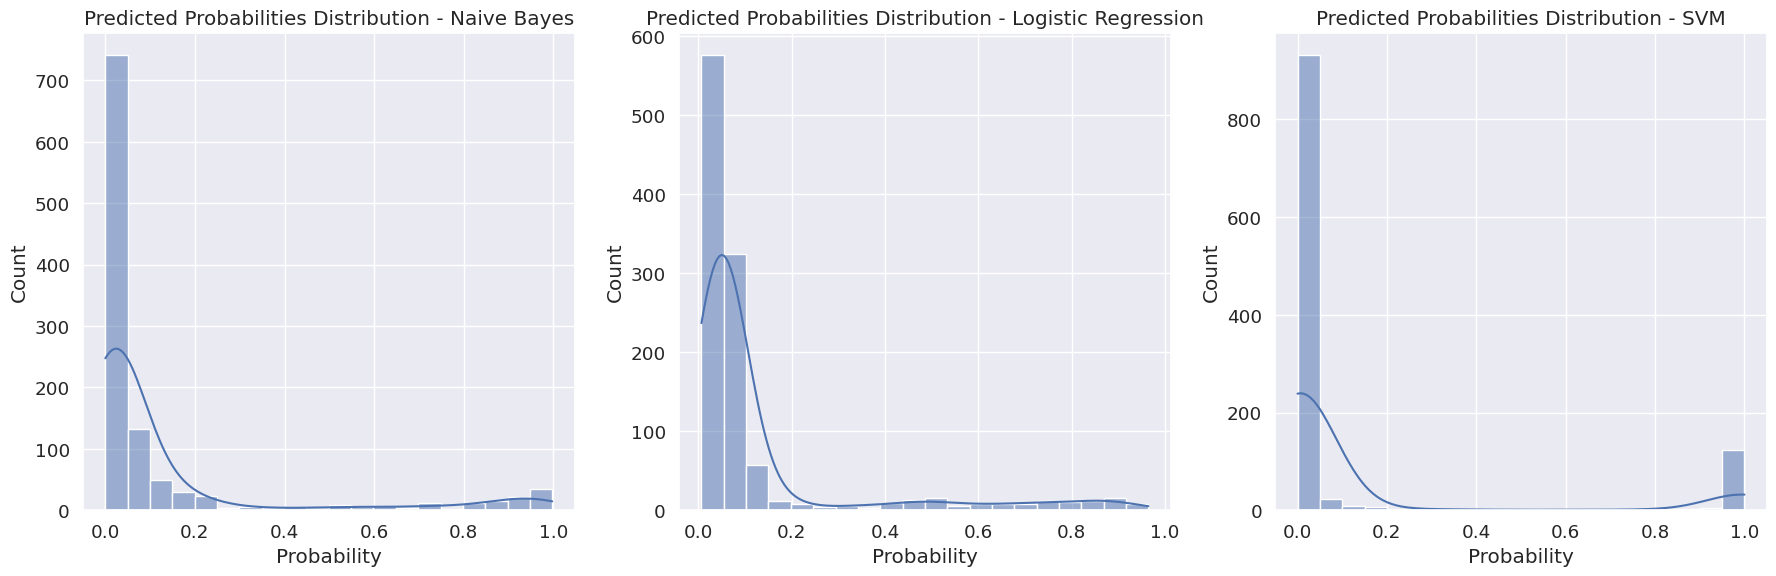

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df and tfidf_matrix are already defined from previous steps

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['message'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['v1'], test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True)
}

# Dictionary to store predicted probabilities
probabilities = {}

plt.figure(figsize=(18, 6))

for i, (name, classifier) in enumerate(classifiers.items(), 1):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict probabilities for ROC curve
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Store predicted probabilities for histogram
    probabilities[name] = y_prob

    # Plot histogram of predicted probabilities
    plt.subplot(1, 3, i)
    sns.histplot(y_prob, bins=20, kde=True)
    plt.title(f'Predicted Probabilities Distribution - {name}')
    plt.xlabel('Probability')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

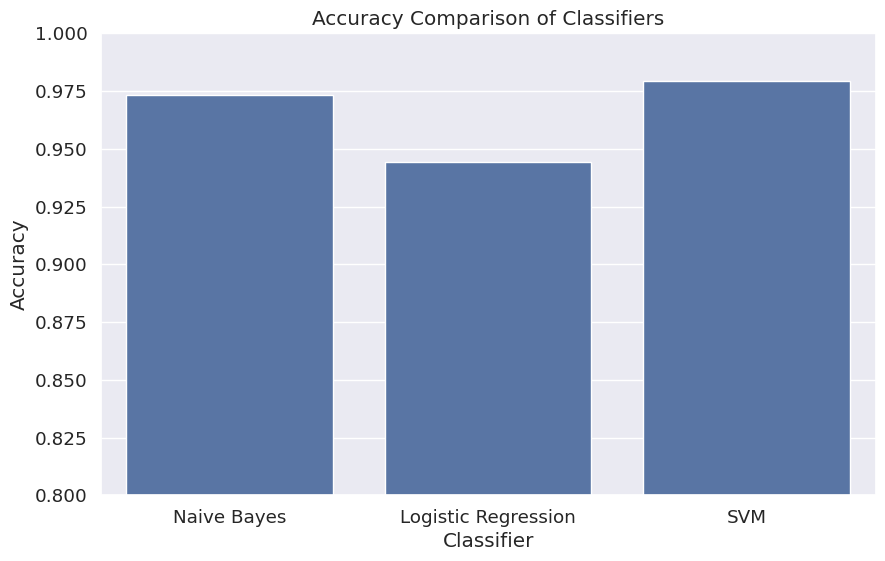

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming df and tfidf_matrix are already defined from previous steps

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['message'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['v1'], test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True)
}

# Dictionary to store accuracies
accuracies = {}

for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

# Plot bar chart for accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylim(0.8, 1.0)  # Setting y-axis limits for better visualization
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.show()